In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
df4 = pd.read_csv("behavioural_dataset.csv")

In [4]:
df4.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [5]:
df4.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [6]:
df4.duplicated().sum()

0

In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [8]:
pd.options.display.float_format = '{:.2f}'.format
df4.describe()

,Age,No of Dependents,Total Salary,Price
count,99.00,99.00,99.00,99.00
mean,36.31,2.18,2270707.07,1194040.40
std,6.25,1.34,1050777.41,437695.54
min,26.00,0.00,200000.00,110000.00
25%,31.00,2.00,1550000.00,800000.00
50%,36.00,2.00,2100000.00,1200000.00
75%,41.00,3.00,2700000.00,1500000.00
max,51.00,4.00,5200000.00,3000000.00


# Age

In [9]:
df4['Age'].unique()

array([27, 35, 45, 41, 31, 28, 33, 34, 29, 30, 49, 26, 37, 36, 43, 42, 32,
       44, 39, 46, 50, 51], dtype=int64)

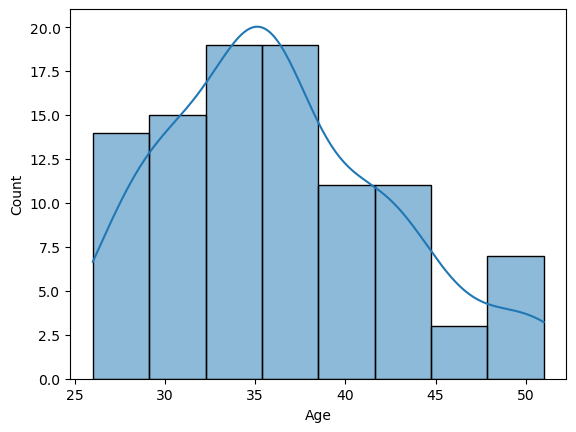

In [10]:
sns.histplot(df4['Age'], kde=True)
plt.show()

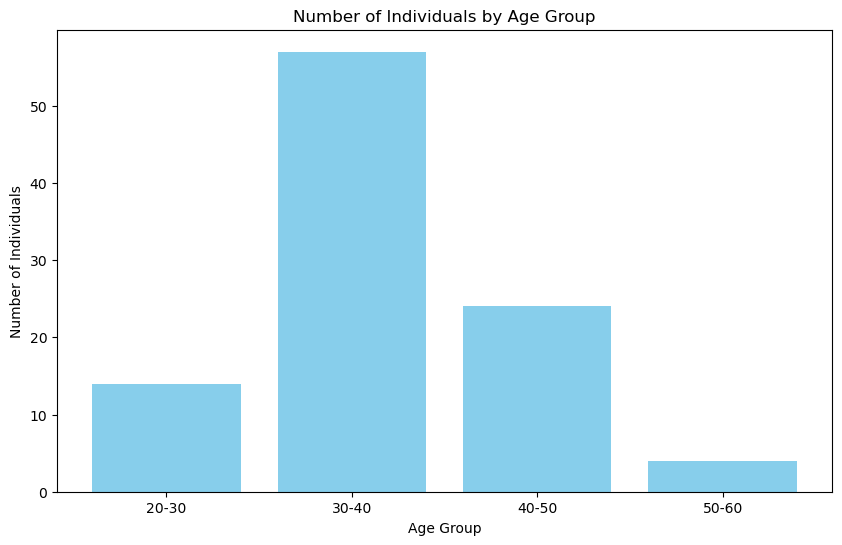

In [11]:
# Define age bins and labels
bins = [20, 30, 40, 50, 60]  # Age bins
labels = ['20-30', '30-40', '40-50', '50-60']  # Labels for bins

# Create age groups
df4['Age Group'] = pd.cut(df4['Age'], bins=bins, labels=labels, right=False)

# Count the number of individuals by age group
age_group_counts = df4['Age Group'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.title('Number of Individuals by Age Group')
plt.show()

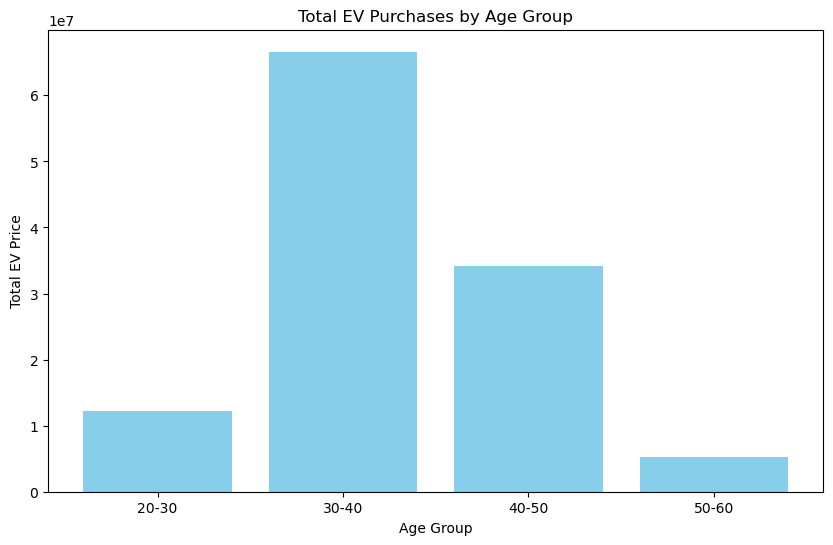

In [12]:
# Aggregate EV purchases by age group
age_group_summary = df4.groupby('Age Group')['Price'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(age_group_summary['Age Group'], age_group_summary['Price'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Total EV Price')
plt.title('Total EV Purchases by Age Group')
plt.show()

* People between age 30 to 40 more tends to buy evs

### Profession

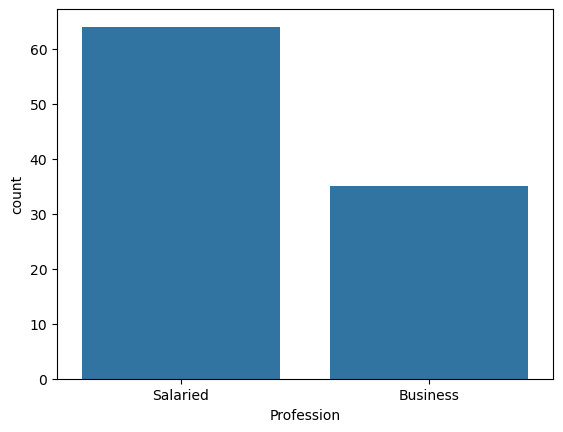

In [13]:
sns.countplot(x=df4['Profession'])
plt.show()

  Age Group  Loan Count
0     20-30           5
1     30-40          18
2     40-50           7
3     50-60           2


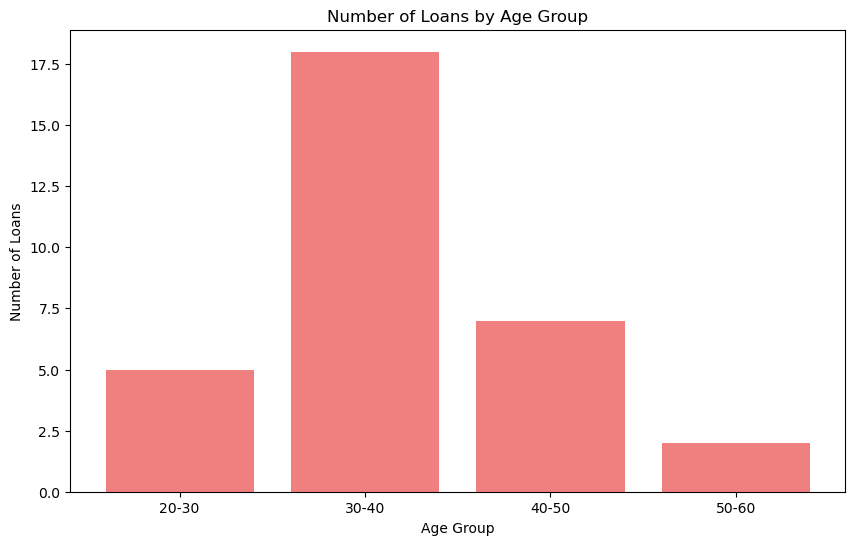

In [14]:
# Count the number of loans by age group
loan_counts = df4[df4['Personal loan'] == 'Yes'].groupby('Age Group').size().reset_index(name='Loan Count')
print(loan_counts)
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(loan_counts['Age Group'], loan_counts['Loan Count'], color='lightcoral')
plt.xlabel('Age Group')
plt.ylabel('Number of Loans')
plt.title('Number of Loans by Age Group')
plt.show()

* Also 30-40 age group is taking more loans

# profession

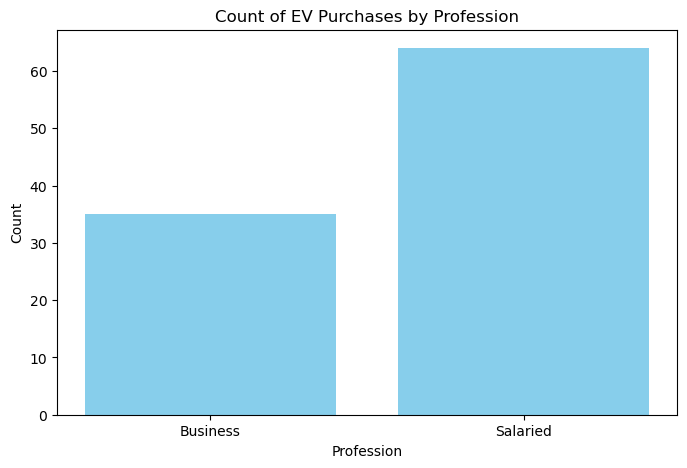

In [15]:
# Count the number of individuals by profession
profession_counts = df4['Profession'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(profession_counts.index, profession_counts.values, color='skyblue')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Count of EV Purchases by Profession')
plt.show()

* salaried prople are more tend to buy evs

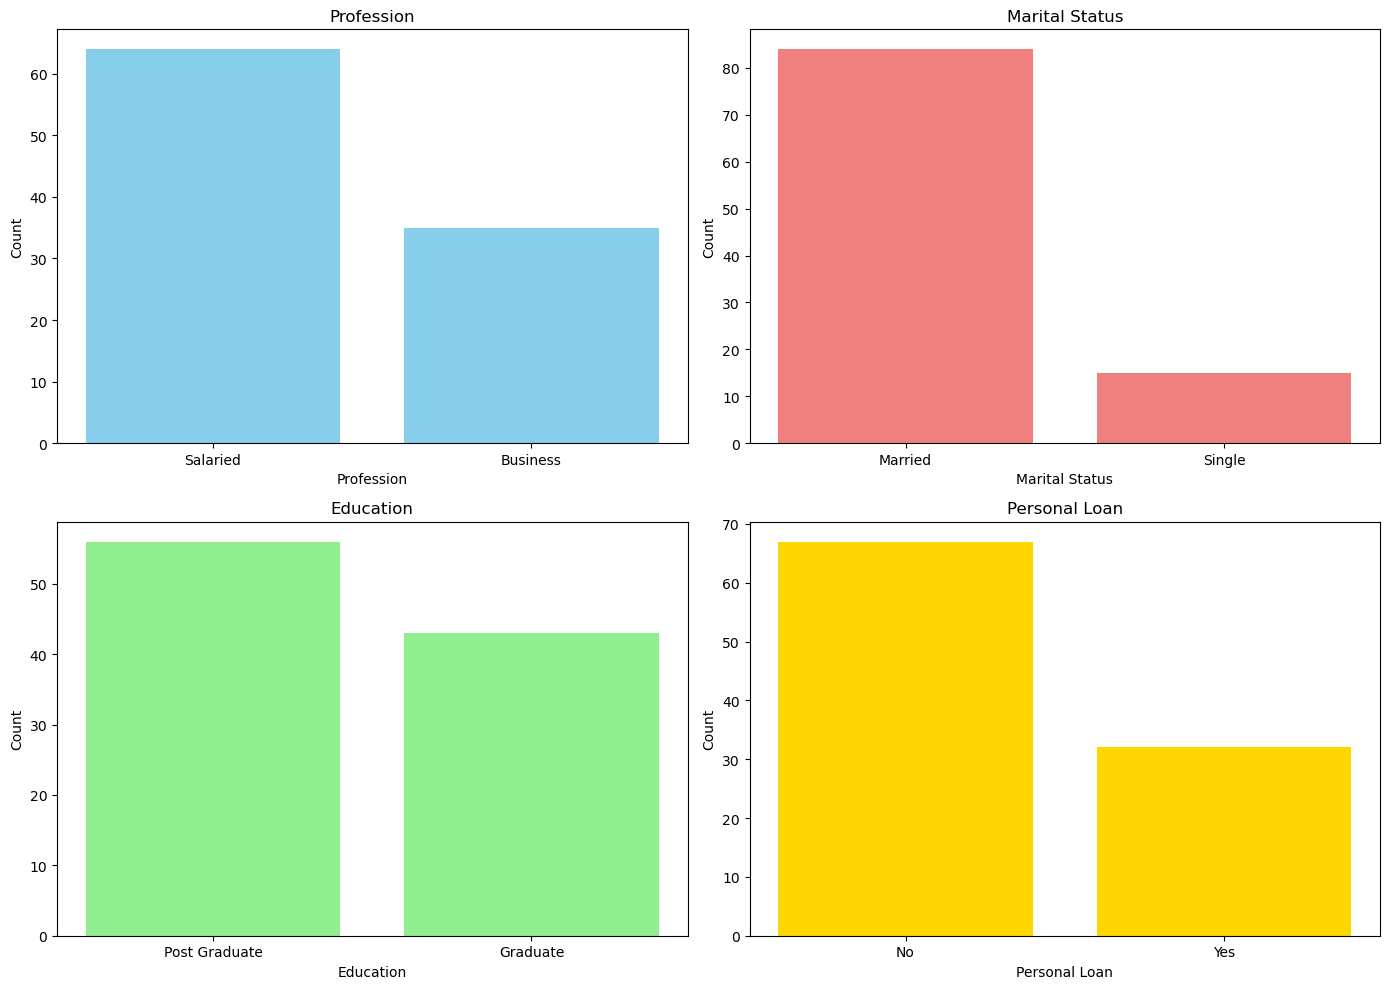

In [16]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for Profession
axs[0, 0].bar(df4['Profession'].value_counts().index, df4['Profession'].value_counts().values, color='skyblue')
axs[0, 0].set_title('Profession')
axs[0, 0].set_xlabel('Profession')
axs[0, 0].set_ylabel('Count')

# Plot for Marital Status
axs[0, 1].bar(df4['Marrital Status'].value_counts().index, df4['Marrital Status'].value_counts().values, color='lightcoral')
axs[0, 1].set_title('Marital Status')
axs[0, 1].set_xlabel('Marital Status')
axs[0, 1].set_ylabel('Count')

# Plot for Education
axs[1, 0].bar(df4['Education'].value_counts().index, df4['Education'].value_counts().values, color='lightgreen')
axs[1, 0].set_title('Education')
axs[1, 0].set_xlabel('Education')
axs[1, 0].set_ylabel('Count')

# Plot for Personal Loan
axs[1, 1].bar(df4['Personal loan'].value_counts().index, df4['Personal loan'].value_counts().values, color='gold')
axs[1, 1].set_title('Personal Loan')
axs[1, 1].set_xlabel('Personal Loan')
axs[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

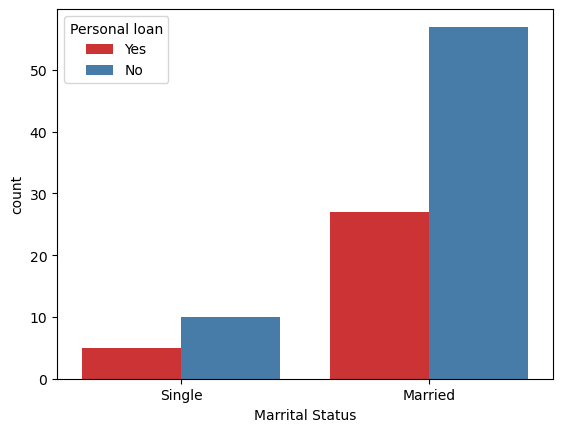

In [17]:
# Plotting the Car loan status with respect to Marrital Status
sns.countplot(x ='Marrital Status', hue = 'Personal loan',  data = df4, palette = 'Set1')
plt.show()



In [18]:
(df4['Marrital Status'].value_counts()['Married'])/((df4['Marrital Status'].value_counts()['Married'])+(df4['Marrital Status'].value_counts()['Single']))*100

84.84848484848484

* majority of dataset consists of married individuals.

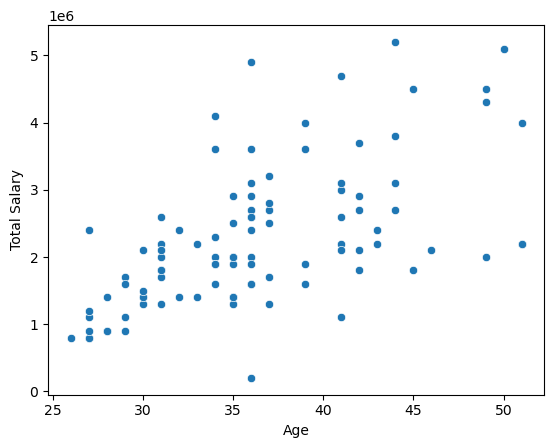

In [19]:
sns.scatterplot(x='Age', y='Total Salary', data=df4)
plt.show()


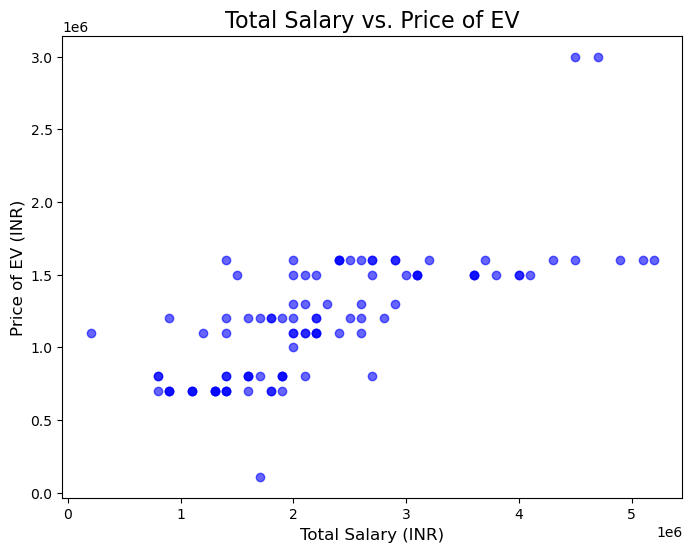

In [20]:
# Total salary Vs ev Price
# Plotting the graph
plt.figure(figsize=(8,6))
plt.scatter(df4['Total Salary'], df4['Price'], color='blue', alpha=0.6)

# Adding titles and labels
plt.title('Total Salary vs. Price of EV', fontsize=16)
plt.xlabel('Total Salary (INR)', fontsize=12)
plt.ylabel('Price of EV (INR)', fontsize=12)

# Display the plot
plt.show()

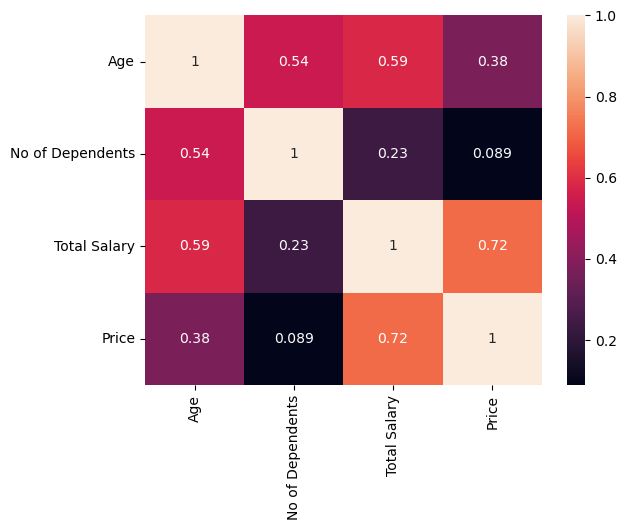

In [21]:
corr = df4.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [22]:

# Descriptive Statistics
mean_salary = df4['Total Salary'].mean()
median_salary = df4['Total Salary'].median()
std_salary = df4['Total Salary'].std()

mean_ev_price = df4['Price'].mean()
median_ev_price = df4['Price'].median()
std_ev_price = df4['Price'].std()

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Standard Deviation Salary: {std_salary}")

print(f"Mean EV Price: {mean_ev_price}")
print(f"Median EV Price: {median_ev_price}")
print(f"Standard Deviation EV Price: {std_ev_price}")

# Identifying Outliers using IQR
Q1_salary = df4['Total Salary'].quantile(0.25)
Q3_salary = df4['Total Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

Q1_ev_price = df4['Price'].quantile(0.25)
Q3_ev_price = df4['Price'].quantile(0.75)
IQR_ev_price = Q3_ev_price - Q1_ev_price

outliers_salary = df4[(df4['Total Salary'] < (Q1_salary - 1.5 * IQR_salary)) | (df4['Total Salary'] > (Q3_salary + 1.5 * IQR_salary))]
outliers_ev_price = df4[(df4['Price'] < (Q1_ev_price - 1.5 * IQR_ev_price)) | (df4['Price'] > (Q3_ev_price + 1.5 * IQR_ev_price))]

print("Outliers in Salary:")
print(outliers_salary)

print("Outliers in EV Price:")
print(outliers_ev_price)




Mean Salary: 2270707.0707070706
Median Salary: 2100000.0
Standard Deviation Salary: 1050777.4114525316
Mean EV Price: 1194040.4040404041
Median EV Price: 1200000.0
Standard Deviation EV Price: 437695.54042274354
Outliers in Salary:
    Age Profession Marrital Status      Education  No of Dependents  \
15   49   Salaried         Married  Post Graduate                 4   
54   41   Salaried         Married       Graduate                 2   
79   45   Salaried         Married  Post Graduate                 2   
81   44   Business         Married       Graduate                 2   
91   36   Salaried         Married  Post Graduate                 3   
95   50   Salaried         Married  Post Graduate                 3   

   Personal loan  Total Salary    Price Age Group  
15            No       4500000  3000000     40-50  
54            No       4700000  3000000     40-50  
79            No       4500000  1600000     40-50  
81            No       5200000  1600000     40-50  
91        

In [23]:
from scipy.stats import pearsonr, spearmanr
# Pearson Correlation
pearson_corr, _ = pearsonr(df4['Total Salary'], df4['Price'])
print(f"Pearson Correlation Coefficient: {pearson_corr}")

# Spearman Correlation
spearman_corr, _ = spearmanr(df4['Total Salary'], df4['Price'])
print(f"Spearman Correlation Coefficient: {spearman_corr}")

Pearson Correlation Coefficient: 0.7174423391791651
Spearman Correlation Coefficient: 0.769580860799536


In [24]:
#!pip install kmodes
from kmodes.kprototypes import KPrototypes

# Kmodes is similar to K means clustering when computing distance for continuous data using mean but for categorical data it uses the mode
# Frequency based dissimilarity measure
# Hence it is more preferrable for clustering multiple datatypes 

In [25]:
df4.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price,Age Group
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,20-30
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,30-40
2,45,Business,Married,Graduate,4,Yes,1800000,1200000,40-50
3,41,Business,Married,Post Graduate,3,No,2200000,1200000,40-50
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000,30-40


In [26]:
df4.drop(columns=['Age Group'], inplace=True)


In [27]:
df4.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [28]:
cluster_features = list(df4.columns)
cluster_data = df4[cluster_features].values

In [29]:
cluster_data[:, 0]

array([27, 35, 45, 41, 31, 28, 31, 33, 34, 34, 35, 35, 29, 30, 31, 49, 26,
       27, 29, 30, 37, 35, 36, 35, 35, 35, 35, 36, 36, 36, 41, 41, 41, 43,
       42, 42, 29, 30, 30, 31, 31, 32, 32, 34, 34, 34, 36, 36, 36, 36, 49,
       49, 44, 44, 41, 41, 41, 27, 27, 28, 28, 30, 31, 31, 31, 39, 39, 39,
       39, 37, 37, 37, 37, 35, 36, 36, 36, 36, 44, 45, 46, 44, 43, 42, 42,
       42, 29, 33, 34, 34, 35, 36, 37, 27, 27, 50, 51, 51, 51],
      dtype=object)

In [30]:
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

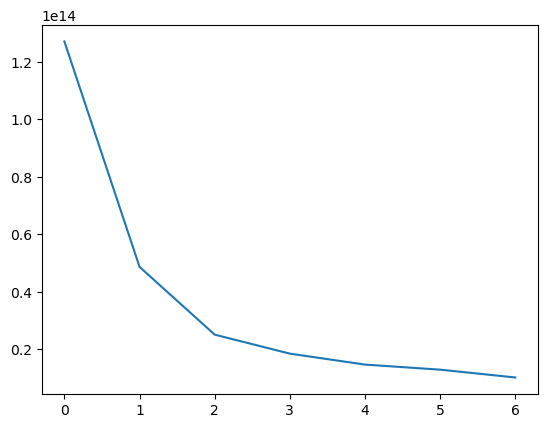

In [31]:
# Finding optimal number of clusters for KPrototypes

cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [32]:
cost

[126979657487180.34,
 48631729380526.18,
 25087753148183.234,
 18491809410726.285,
 14682459816808.33,
 12919647348834.861,
 10204319214982.23]

In [33]:
# fitting data to clusters

kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 27, ncost: 54246126943564.44
Run: 1, iteration: 2/20, moves: 12, ncost: 50057040964014.66
Run: 1, iteration: 3/20, moves: 1, ncost: 50020391397205.32
Run: 1, iteration: 4/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 19, ncost: 51421678794362.086
Run: 2, iteration: 2/20, moves: 6, ncost: 50057040964014.66
Run: 2, iteration: 3/20, moves: 1, ncost: 50020391397205.32
Run: 2, iteration: 4/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 6, ncost: 50057040964014.66
Run: 3, iteration: 2/20, moves: 1, ncost: 50020391397205.32
Run: 3, iteration: 3/20, moves: 0, ncost: 50020391397205.32
Init: initializing c

In [34]:
# Appending the cluster data

df4['Cluster'] = clusters

In [35]:
# Average cost of the EV
df4.Price.mean()


1194040.4040404041

In [36]:
# Average cost of a car in segment 1 
df4.Price[df4.Cluster==0].mean()

1660869.5652173914

In [37]:
df4['Price'][df4.Cluster==1].max()

1600000

In [38]:
# Average cost of a car in segment 1 
df4.Price[df4.Cluster==1].mean()

1052763.1578947369

In [39]:
df4['Cluster'].value_counts(normalize=True) * 100

1   76.77
0   23.23
Name: Cluster, dtype: float64

In [40]:
# Segregrating each cluster

Cluster_0 = df4[df4.Cluster==0]
Cluster_1 = df4[df4.Cluster==1]

In [41]:
df4['Cluster'].value_counts()

1    76
0    23
Name: Cluster, dtype: int64

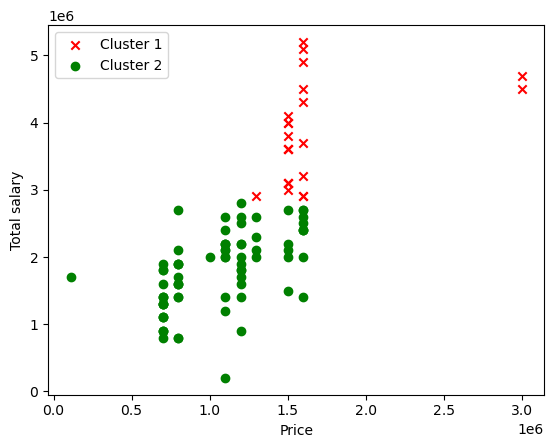

In [42]:
# plotting the effct of salary and ev price on cluster data

plt.scatter(Cluster_0.Price, Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.Price, Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('Price')
plt.ylabel('Total salary')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased

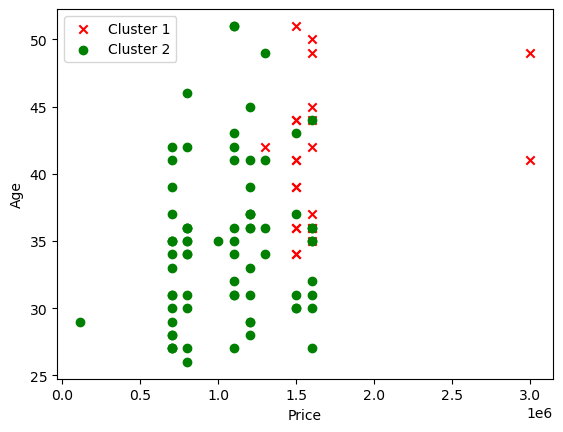

In [43]:
plt.scatter(Cluster_0.Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('Price')
plt.ylabel('Age')
plt.show()

In [44]:
from mpl_toolkits.mplot3d import Axes3D

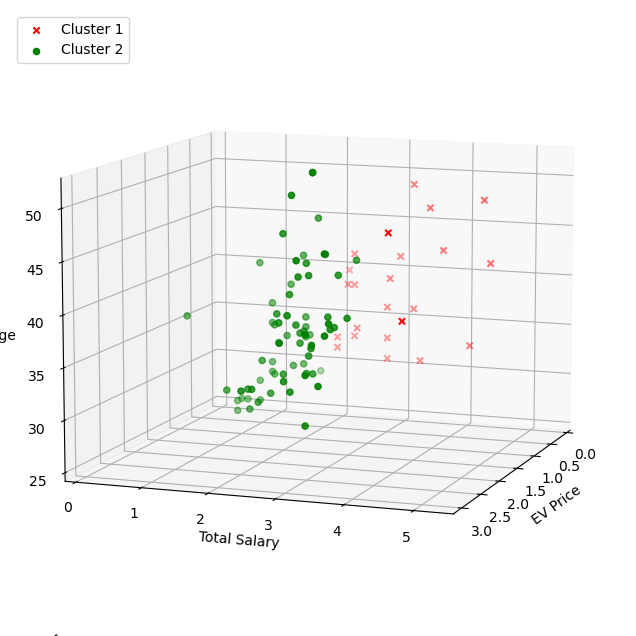

In [45]:
# plotting influence of age 

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()


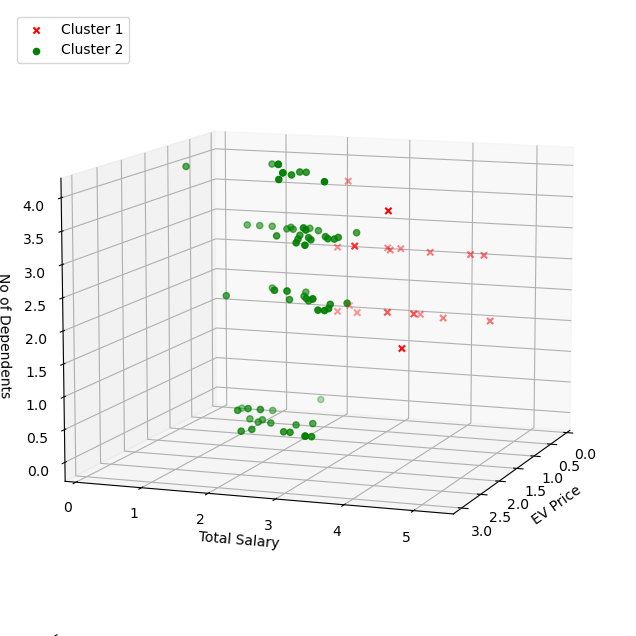

In [46]:
# plotting influence of No of Dependents

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.Price, Cluster_1['Total Salary'],Cluster_1['No of Dependents'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10,20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()

In [47]:
df4['No of Dependents'].value_counts()

3    34
2    29
0    22
4    14
Name: No of Dependents, dtype: int64

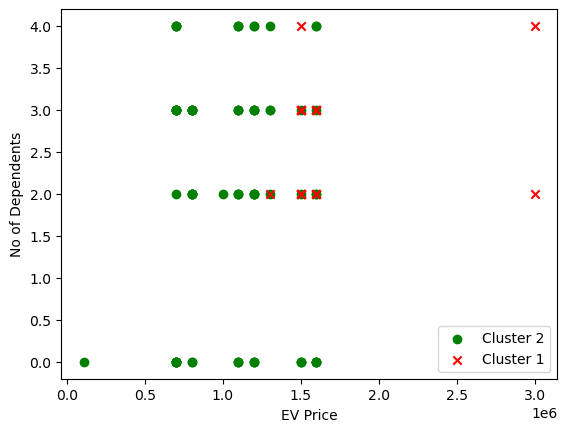

In [48]:
# plotting the effct of no of dependents and ev price on cluster data


plt.scatter(Cluster_1.Price, Cluster_1['No of Dependents'],color='green', label = 'Cluster 2')
plt.scatter(Cluster_0.Price, Cluster_0['No of Dependents'],color='red', marker = 'x', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased

### K- Mean clustering

In [49]:
from sklearn.cluster import KMeans
import seaborn as sns


# Segmenting the data into salary ranges
bins = [0, 1000000, 3000000, 5000000]
labels = ['Low', 'Medium', 'High']
df4['Salary_Range'] = pd.cut(df4['Total Salary'], bins=bins, labels=labels, include_lowest=True)

# Analyzing EV prices within each segment
salary_segments = df4.groupby('Salary_Range')['Price'].describe()
print(salary_segments)

# K-means clustering
X = df4[['Total Salary', 'Price']]


              count       mean       std        min        25%        50%  \
Salary_Range                                                                
Low            8.00  837500.00 199553.07  700000.00  700000.00  750000.00   
Medium        72.00 1101527.78 340875.67  110000.00  800000.00 1100000.00   
High          17.00 1705882.35 489222.07 1500000.00 1500000.00 1500000.00   

                    75%        max  
Salary_Range                        
Low           875000.00 1200000.00  
Medium       1300000.00 1600000.00  
High         1600000.00 3000000.00  


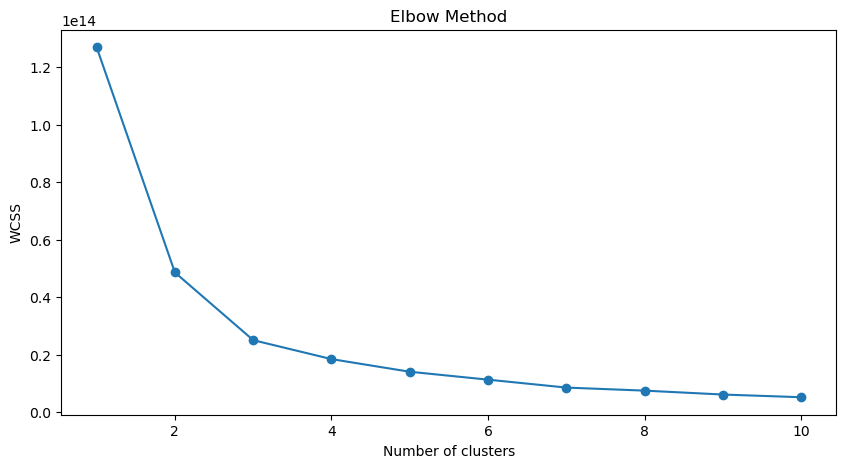

In [50]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



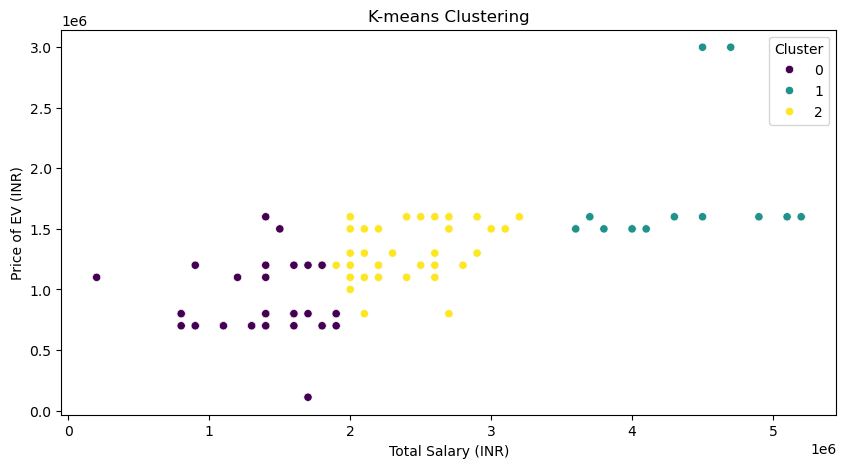

In [51]:
# Applying K-means with the optimal number of clusters 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df4['Cluster'] = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Total Salary', y='Price', hue='Cluster', data=df4, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Total Salary (INR)')
plt.ylabel('Price of EV (INR)')
plt.show()

# co relation

In [52]:
# Calculate correlation
correlation_matrix = df4.corr()
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)

print(price_correlation)

Price              1.00
Total Salary       0.72
Cluster            0.49
Age                0.38
No of Dependents   0.09
Name: Price, dtype: float64
